In [1]:
from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8'))
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    task3 = rs.randint(low=1, high=5)
    task4 = rs.randint(low=1, high=4)
    print ('Your tasks are 1.{}, 2.{}, 3.{}, 4.{}'.format(task1, task2, task3, task4))

enter phystech e-mail
akimenkova.ma@phystech.edu
Your tasks are 1.2, 2.3, 3.2, 4.3


In [17]:
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_iris
import statsmodels.stats.api as sms
from arch.bootstrap import IndependentSamplesBootstrap

# Задача 1.2

Задана выборка описаний 150 экземпляров ириса разных видов. Описание каждого ириса состоит из четырех признаков:

Длина наружной доли околоцветника (англ. sepal length);
Ширина наружной доли околоцветника (англ. sepal width);
Длина внутренней доли околоцветника (англ. petal length);
Ширина внутренней доли околоцветника (англ. petal width).

Требуется определить насколько в среднем различается каждая из этих характеристик между разными видами.

Для каждой из данных характеристик выбрать подходящий размер эффекта из https://en.wikipedia.org/wiki/Effect_size#Types.

#### Выборка:

In [84]:
iris_X, iris_species= load_iris(return_X_y=True)

In [85]:
X = pd.DataFrame(iris_X)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [86]:
X['species'] = iris_species

In [87]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Построим boxplot

In [88]:
X_melt = X.melt(id_vars=["species"], 
                  value_vars=X.columns[:-1], 
                  var_name="x",
                  value_name="y") 
X_melt.head()

,species,x,y
0,0,sepal_length,5.1
1,0,sepal_length,4.9
2,0,sepal_length,4.7
3,0,sepal_length,4.6
4,0,sepal_length,5.0


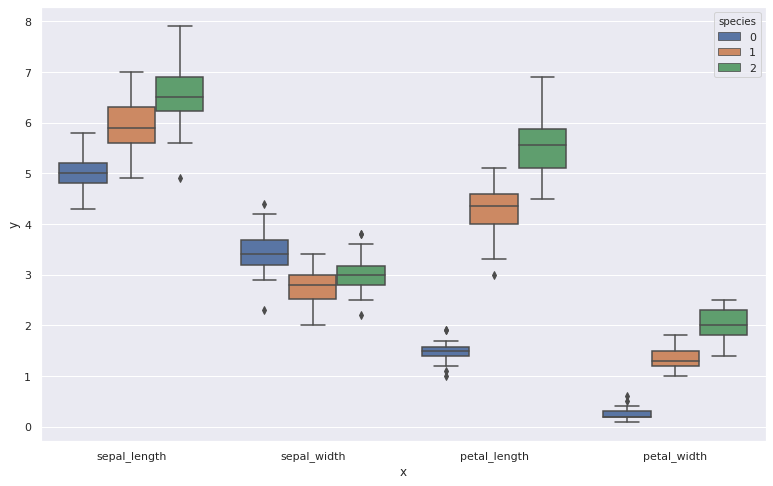

In [89]:
plt.figure(figsize=(13, 8)) 
sns.boxplot(x="x", y="y",
            hue="species",
            data=X_melt)

Видно, что все характеристики, кроме sepal_width, довольно сильно различаются между видами.

#### Проверим подвыборки на нормальность с помощью теста Шапиро.

Для вида 0

In [111]:
X0 = X[X['species']==0]

In [127]:
print('sepal length:')
print(st.shapiro(X0['sepal_length'].values))
print('\n')
print('sepal width:')
print(st.shapiro(X0['sepal_width'].values))
print('\n')
print('petal length:')
print(st.shapiro(X0['petal_length'].values))
print('\n')
print('petal width:')
print(st.shapiro(X0['petal_width'].values))

sepal length:
(0.9776989221572876, 0.4595281183719635)


sepal width:
(0.97171950340271, 0.2715264856815338)


petal length:
(0.9549766182899475, 0.05481043830513954)


petal width:
(0.7997642159461975, 8.65842082475865e-07)


Для вида 1

In [128]:
X1 = X[X['species']==1]

In [129]:
print('sepal length:')
print(st.shapiro(X1['sepal_length'].values))
print('\n')
print('sepal width:')
print(st.shapiro(X1['sepal_width'].values))
print('\n')
print('petal length:')
print(st.shapiro(X1['petal_length'].values))
print('\n')
print('petal width:')
print(st.shapiro(X1['petal_width'].values))

sepal length:
(0.9778355956077576, 0.46473264694213867)


sepal width:
(0.9741330742835999, 0.33798879384994507)


petal length:
(0.9660047888755798, 0.1584833413362503)


petal width:
(0.947626531124115, 0.027278218418359756)


Для вида 2

In [130]:
X2 = X[X['species']==2]

In [131]:
print('sepal length:')
print(st.shapiro(X2['sepal_length'].values))
print('\n')
print('sepal width:')
print(st.shapiro(X2['sepal_width'].values))
print('\n')
print('petal length:')
print(st.shapiro(X2['petal_length'].values))
print('\n')
print('petal width:')
print(st.shapiro(X2['petal_width'].values))

sepal length:
(0.9711798429489136, 0.25832483172416687)


sepal width:
(0.9673910140991211, 0.1809043288230896)


petal length:
(0.9621862769126892, 0.10977369546890259)


petal width:
(0.9597718715667725, 0.08695744723081589)


#### Определим среднее значение для каждого признака

In [135]:
X0_mean = np.mean(X0, axis = 0)
X0_mean

sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
species         0.000
dtype: float64

In [136]:
X1_mean = np.mean(X1, axis = 0)
X1_mean

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
species         1.000
dtype: float64

In [137]:
X2_mean = np.mean(X2, axis = 0)
X2_mean

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
species         2.000
dtype: float64

In [138]:
mean01 = X0_mean-X1_mean
mean12 = X1_mean-X2_mean
mean02 = X0_mean-X2_mean

In [139]:
print(mean01)
print(mean12)
print(mean02)

sepal_length   -0.930
sepal_width     0.658
petal_length   -2.798
petal_width    -1.080
species        -1.000
dtype: float64
sepal_length   -0.652
sepal_width    -0.204
petal_length   -1.292
petal_width    -0.700
species        -1.000
dtype: float64
sepal_length   -1.582
sepal_width     0.454
petal_length   -4.090
petal_width    -1.780
species        -2.000
dtype: float64


#### Стандартное отклонение

In [140]:
X0_std = np.std(X0, axis = 0)
X1_std = np.std(X1, axis = 0)
X2_std = np.std(X2, axis = 0)

In [141]:
print(X0_std)
print(X1_std)
print(X2_std)

sepal_length    0.348947
sepal_width     0.375255
petal_length    0.171919
petal_width     0.104326
species         0.000000
dtype: float64
sepal_length    0.510983
sepal_width     0.310644
petal_length    0.465188
petal_width     0.195765
species         0.000000
dtype: float64
sepal_length    0.629489
sepal_width     0.319255
petal_length    0.546348
petal_width     0.271890
species         0.000000
dtype: float64


#### Посчитаем размер эффекта Cohen

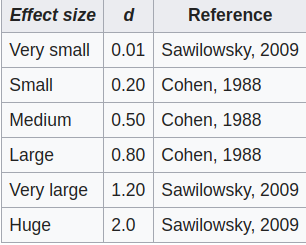

In [142]:
def effect_size(x1, x2):
    s = np.sqrt(((len(x1) - 1) * np.std(x1, ddof=1)**2 \
                 + (len(x2) - 1) * np.std(x2, ddof=1)**2) \
                /(len(x1) + len(x2) - 2))
    return np.abs((np.mean(x1) - np.mean(x2))/s)

Вид 0 vs вид 1

In [143]:
effect_size(X0, X1)

sepal_length    2.104197
sepal_width     1.890995
petal_length    7.898544
petal_width     6.816068
species              inf
dtype: float64

Вид 0 vs 2

In [148]:
effect_size(X0, X2)

sepal_length    3.077239
sepal_width     1.290070
petal_length    9.997237
petal_width     8.557160
species              inf
dtype: float64

Вид 1 vs 2

In [149]:
effect_size(X1, X2)

sepal_length    1.125833
sepal_width     0.641152
petal_length    2.520756
petal_width     2.925073
species              inf
dtype: float64

### Как видно по таблице, размер эффекта во всех случаях получился большой, значит характеристики в среднем сильно отличаются между собой между различными видами.